# **Importing Libraries**

In [67]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score

**importing Dataset**

In [68]:
df = pd.read_csv('/content/Crop_Yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Lahore,Maize,1990,36613,1485,121.0,16.37
1,1,Lahore,Potatoes,1990,66667,1485,121.0,16.37
2,2,Lahore,"Rice, paddy",1990,23333,1485,121.0,16.37
3,3,Lahore,Sorghum,1990,12500,1485,121.0,16.37
4,4,Lahore,Soybeans,1990,7000,1485,121.0,16.37


# **Crop Basic Info**

In [69]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.shape

(2051, 7)

In [70]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Lahore,Maize,1990,36613,1485,121.0,16.37
1,Lahore,Potatoes,1990,66667,1485,121.0,16.37
2,Lahore,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Lahore,Sorghum,1990,12500,1485,121.0,16.37
4,Lahore,Soybeans,1990,7000,1485,121.0,16.37


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           2051 non-null   object 
 1   Item                           2051 non-null   object 
 2   Year                           2051 non-null   int64  
 3   hg/ha_yield                    2051 non-null   int64  
 4   average_rain_fall_mm_per_year  2051 non-null   int64  
 5   pesticides_tonnes              2051 non-null   float64
 6   avg_temp                       2051 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 112.3+ KB


In [72]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [73]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# **Exploratory Data Analysis (EDA)**

In [74]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,2001.609946,89896.748415,650.380790,28249.970663,16.926816
std,7.030177,101999.803471,306.681253,28400.020953,4.045259
min,1990.000000,578.000000,89.000000,8.000000,7.400000
25%,1995.000000,20993.000000,534.000000,880.640000,14.110000
50%,2001.000000,46532.000000,534.000000,26156.000000,17.460000
75%,2008.000000,100000.000000,591.000000,38065.680000,18.730000
max,2013.000000,385434.000000,1485.000000,171945.540000,25.940000


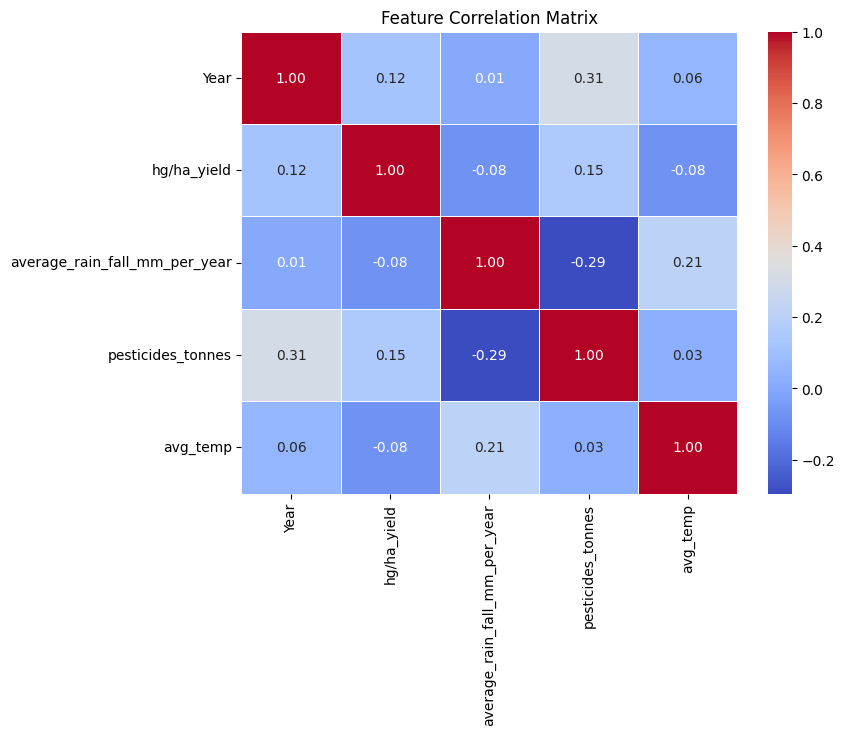

In [75]:
# Correlation heatmap
# Correlation heatmap
plt.figure(figsize=(8, 6))
# Replace 'crop' with 'df' since 'df' is the DataFrame containing your data
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f") # Select only numeric features for correlation
plt.title("Feature Correlation Matrix")
plt.show()

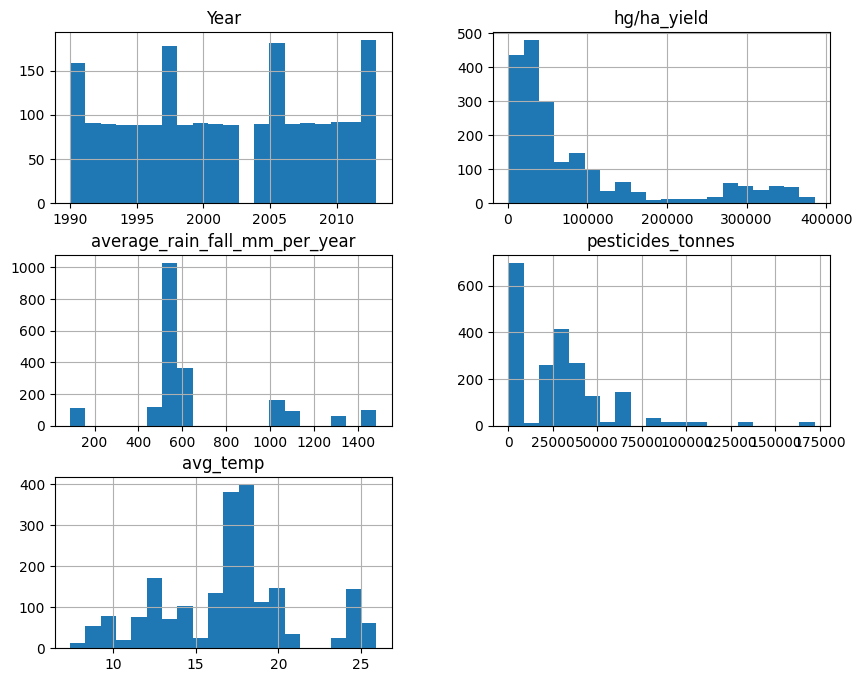

In [76]:
# Plot feature distributions
df.hist(figsize=(10, 8), bins=20)
plt.show()

# **Transforming average_rain_fall_mm_per_year**

In [77]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [78]:
df = df.drop(to_drop)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Lahore,Maize,1990,36613,1485,121.0,16.37
1,Lahore,Potatoes,1990,66667,1485,121.0,16.37
2,Lahore,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Lahore,Sorghum,1990,12500,1485,121.0,16.37
4,Lahore,Soybeans,1990,7000,1485,121.0,16.37
...,...,...,...,...,...,...,...
2046,Hafizabad,Maize,2012,73404,1292,268.2,25.46
2047,Hafizabad,Plantains and others,2012,77391,1292,268.2,25.46
2048,Hafizabad,Sweet potatoes,2012,34855,1292,268.2,25.46
2049,Hafizabad,Cassava,2013,221509,1292,268.2,25.88


In [79]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           2051 non-null   object 
 1   Item                           2051 non-null   object 
 2   Year                           2051 non-null   int64  
 3   hg/ha_yield                    2051 non-null   int64  
 4   average_rain_fall_mm_per_year  2051 non-null   float64
 5   pesticides_tonnes              2051 non-null   float64
 6   avg_temp                       2051 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 112.3+ KB


# **Graph Frequency vs Area**

In [81]:
len(df['Area'].unique())

31

<ipython-input-82-641d169e4c70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Area'],palette='dark')


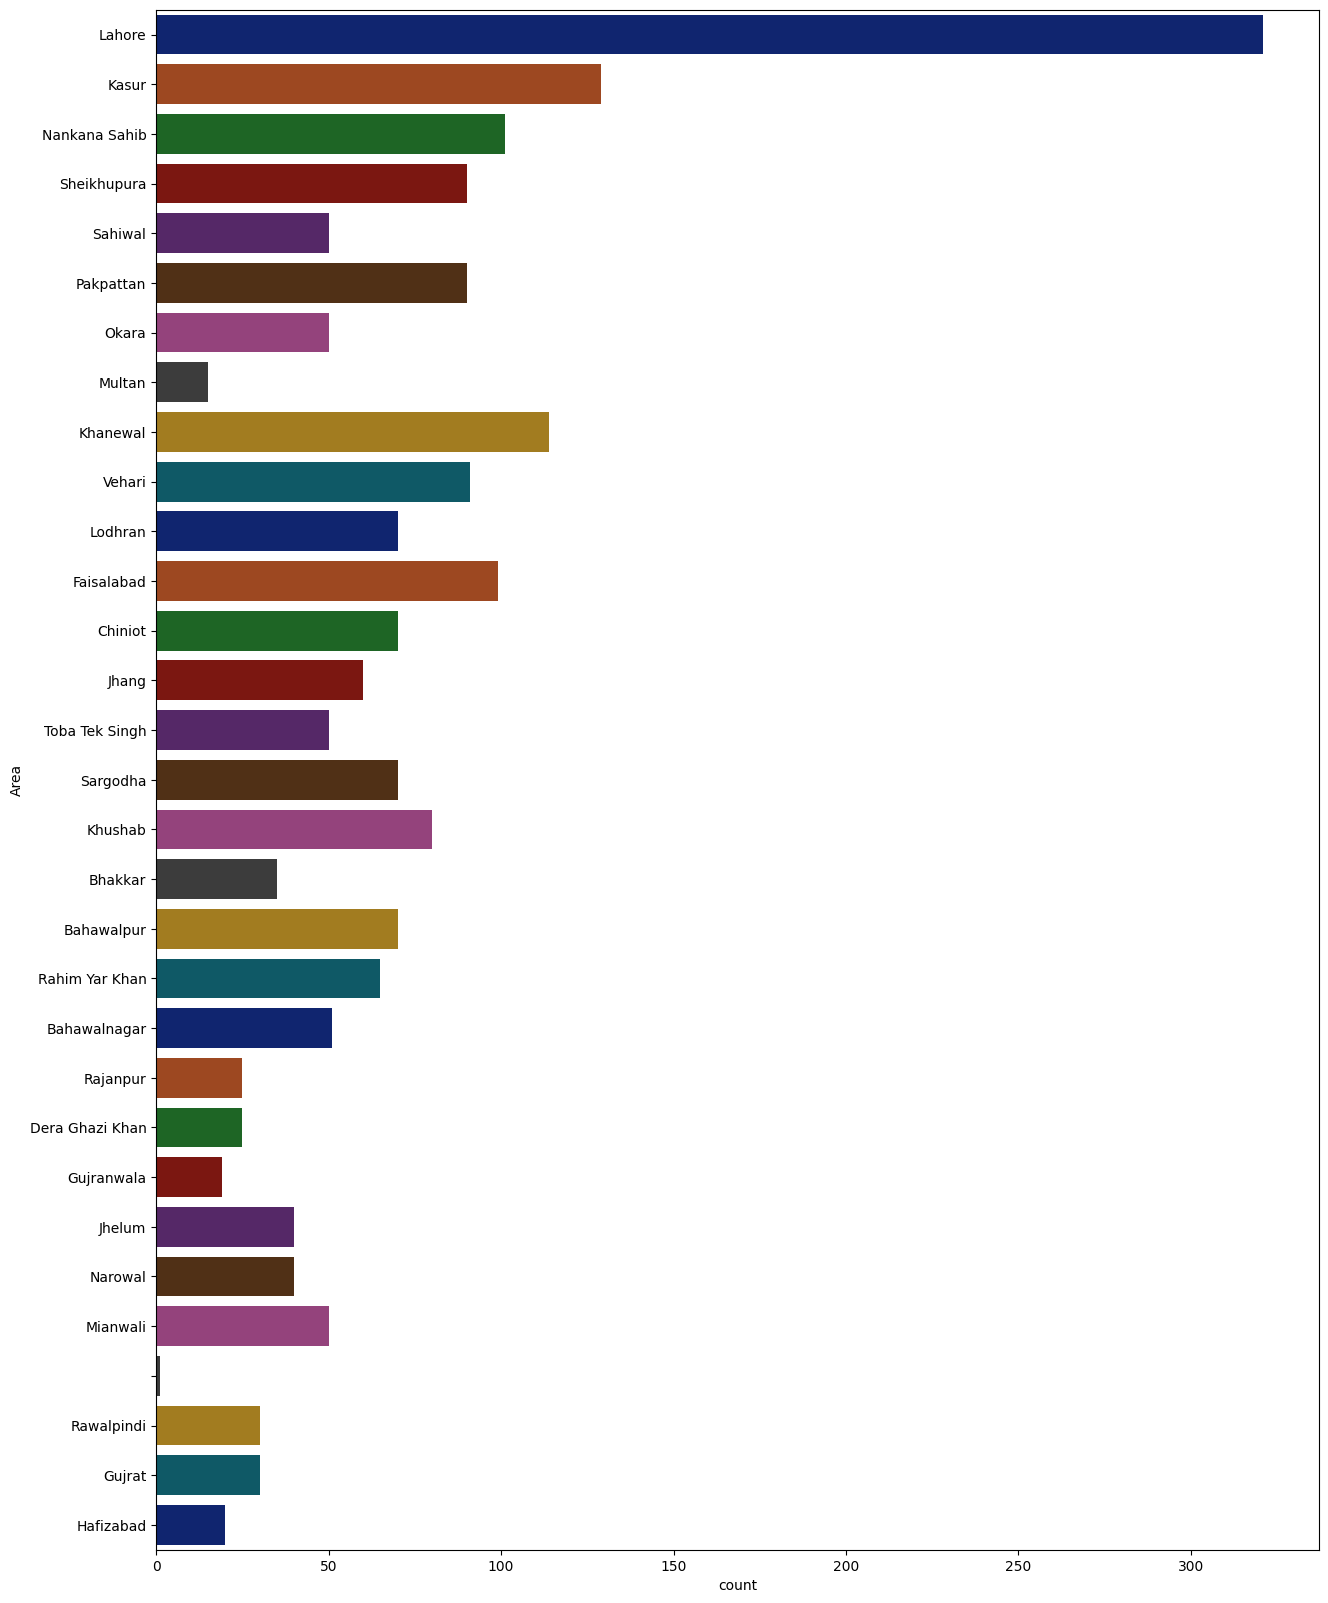

In [82]:

plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'],palette='dark')
plt.show()

# **yield_per_district**

In [83]:
punjab = df['Area'].unique()
yield_per_district = []
for district in punjab:
    yield_per_district.append(df[df['Area']==district]['hg/ha_yield'].sum())

In [84]:
df['hg/ha_yield'].sum()

184378231

**Yield Per district Graph**

<ipython-input-85-adadb7624802>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=punjab, x=yield_per_district, palette='dark')


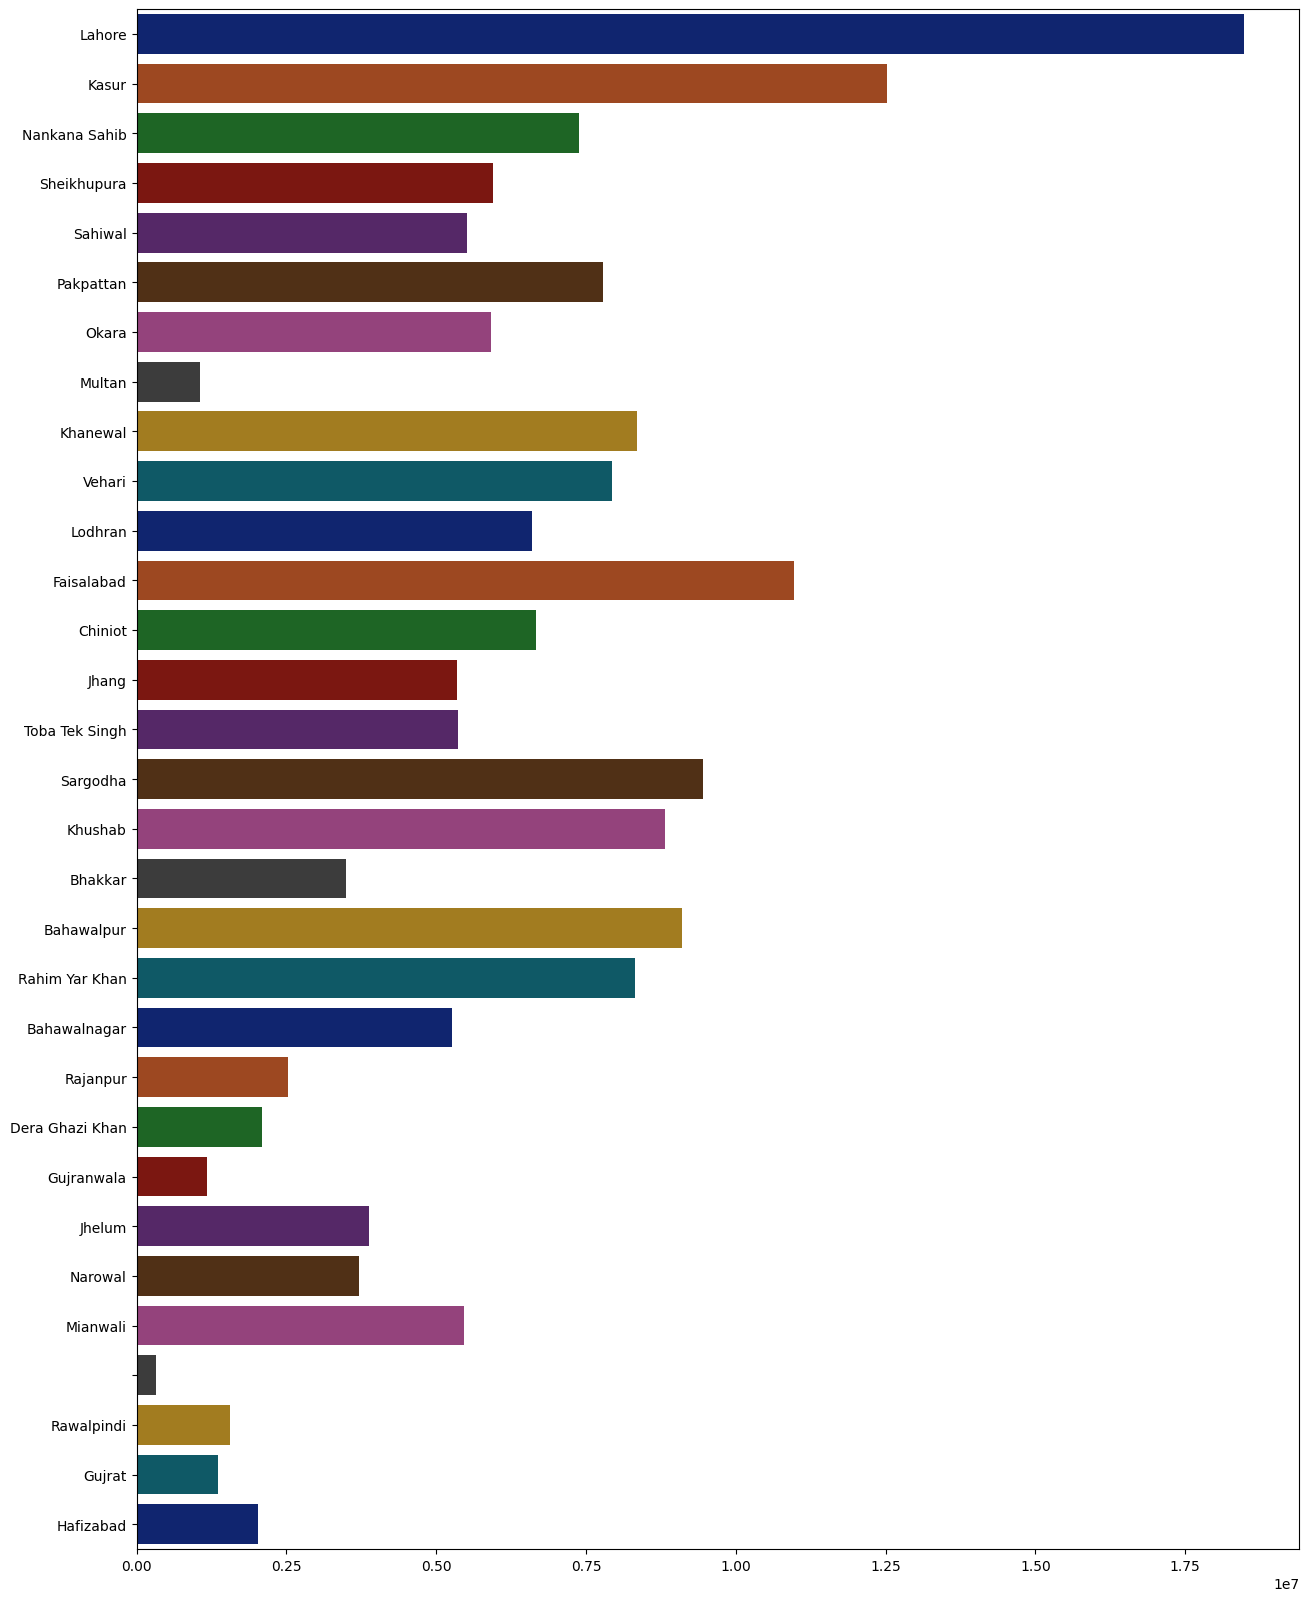

In [85]:
plt.figure(figsize=(15, 20))
# Use the 'punjab' variable, which holds the unique district names, for the y-axis
sns.barplot(y=punjab, x=yield_per_district, palette='dark')
plt.show()

# **Graph Frequency vs Item**

<ipython-input-86-13fac974e768>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Item'],palette='dark')


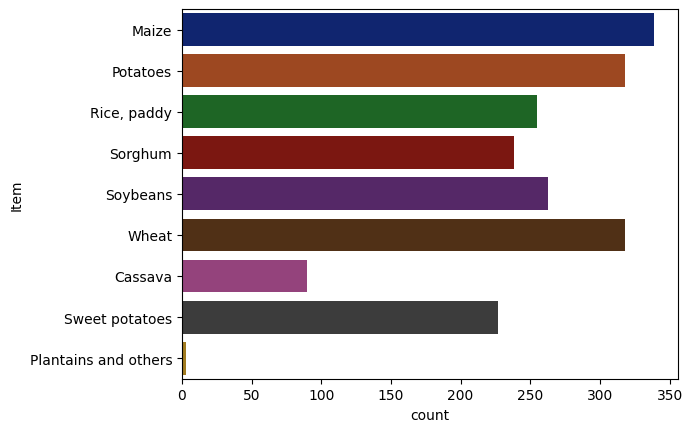

In [86]:
sns.countplot(y=df['Item'],palette='dark')
plt.show()

# **Yield Vs Item**

<ipython-input-87-61c1316fc83d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crops,x=yield_per_crop,palette='dark')


<Axes: >

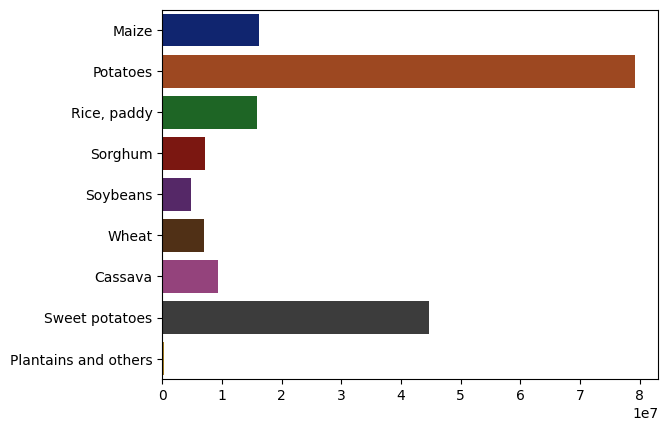

In [87]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())
sns.barplot(y=crops,x=yield_per_crop,palette='dark')

# ***Train Test split & Rearranging Columns***

In [88]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [89]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Lahore,Maize,36613
1,1990,1485.0,121.0,16.37,Lahore,Potatoes,66667
2,1990,1485.0,121.0,16.37,Lahore,"Rice, paddy",23333


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [91]:
X_train.shape

(1640, 6)

In [92]:
X_train.head(1)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
1211,1999,534.0,34200.0,19.75,Khushab,Soybeans


# *Converting Categorical to Numerical and Scaling the values*

In [93]:
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [94]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [95]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [96]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Bahawalnagar', 'OHE__Area_Bahawalpur',
       'OHE__Area_Bhakkar', 'OHE__Area_Chiniot',
       'OHE__Area_Dera Ghazi Khan', 'OHE__Area_Faisalabad',
       'OHE__Area_Gujranwala', 'OHE__Area_Gujrat', 'OHE__Area_Hafizabad',
       'OHE__Area_Jhang', 'OHE__Area_Jhelum', 'OHE__Area_Kasur',
       'OHE__Area_Khanewal', 'OHE__Area_Khushab', 'OHE__Area_Lahore',
       'OHE__Area_Lodhran', 'OHE__Area_Mianwali', 'OHE__Area_Multan',
       'OHE__Area_Nankana Sahib', 'OHE__Area_Narowal', 'OHE__Area_Okara',
       'OHE__Area_Pakpattan', 'OHE__Area_Rahim Yar Khan',
       'OHE__Area_Rajanpur', 'OHE__Area_Rawalpindi', 'OHE__Area_Sahiwal',
       'OHE__Area_Sargodha', 'OHE__Area_Sheikhupura',
       'OHE__Area_Toba Tek Singh', 'OHE__Area_Vehari', 'OHE__Item_Maize',
       'OHE__Item_Plantains and others', 'OHE__Item_Potatoes',
   

# **Training Models**

In [97]:
import matplotlib.pyplot as plt # Importing matplotlib.pyplot as plt
import seaborn as sns

# Define the model names and accuracy values
model = ['lr', 'lss', 'Rid', 'Dtr'] # Assuming model names from the previous cell
acc = [] # Initialize an empty list to store accuracy values
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    acc.append(r2_score(y_test, y_pred)) # Calculate and store accuracy for each model
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 33713.83130563981 score : 0.779804315697403
lss : mae : 33725.94952270531 score : 0.7796807794601479
Rid : mae : 33548.336017361886 score : 0.7801928003405495
Dtr : mae : 3770.1532846715327 score : 0.9866844368576186


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553576446469.5662, tolerance: 1722271047.1185095
  model = cd_fast.sparse_enet_coordinate_descent(


***Selecting Decision Tree***

In [98]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([ 84609., 385434.,  18555., 298183., 106570.,  17136.,  34588.,
        32261.,  82580.,  88003.,   8000.,  84609.,  16810., 362787.,
        31254.,  64441., 294270.,  16348.,  57983.,  66168., 244444.,
        26234.,  83305.,  22000.,  89098., 350887., 289849., 100000.,
        15551.,  24876., 351334., 100000.,  48046., 336000., 149950.,
       100000.,  46620., 100000.,  15000.,  47544.,  14235.,  24934.,
       355463.,  81537., 362787.,  21141., 347368.,  14327.,  68081.,
        48263.,  44240., 288984., 289220., 188902.,  16168., 354317.,
        16168., 362787., 305491.,   7136.,  83305.,  88000.,  24561.,
        27251.,  95441.,  21809., 101359.,  21697.,  51721.,  93071.,
        30279.,  24762.,  25846.,  20698.,  75333.,  21076.,   2463.,
        82865.,   5000.,  88346.,  51212.,  27175.,  95441., 140517.,
         9173.,  49103.,  18261.,  11111., 238938., 176667.,  48263.,
        20213.,  88427., 313056.,  69500.,  40000., 284527.,  21321.,
         8575., 2845

# *Accuracy Comparison*

<ipython-input-99-51c20f68fac0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

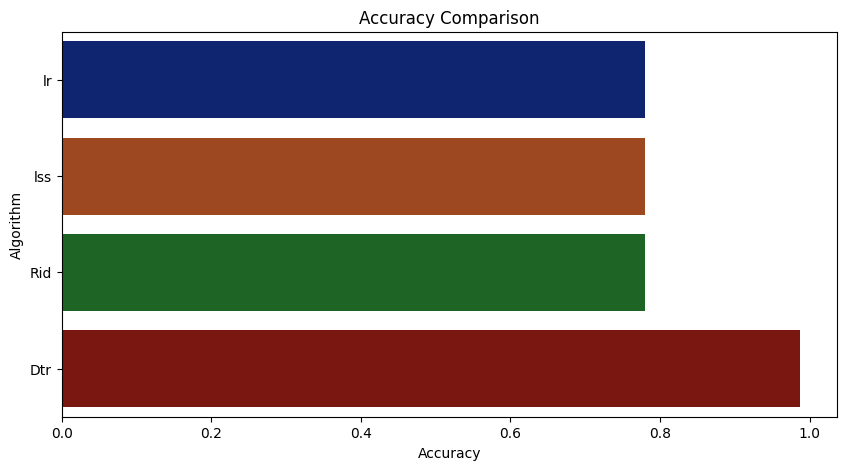

In [99]:
# Create the bar plot using the defined variables
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

# ***Predictive System***

In [100]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 2019
average_rain_fall_mm_per_year =100
pesticides_tonnes = 455
avg_temp = 	20
Area = 'Gujrat'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [101]:
result

array([69533.])

# **Pickle Files**

In [102]:
import pickle

# Save Decision Tree Regressor model
with open('dtr.pkl', 'wb') as file:
    pickle.dump(dtr, file)

# Save Preprocessor
with open('preprocessor.pkl', 'wb') as file:
    pickle.dump(preprocesser, file) # Change 'preprocessor' to 'preprocesser'


In [103]:
from google.colab import files

# Download both models
files.download('dtr.pkl')
files.download('preprocessor.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
import sklearn
print(sklearn.__version__)

1.6.1


In [105]:
# Instead of:
# Item.head(30)

# You likely want to inspect the 'Item' column in the DataFrame 'df':
df['Item']

,Item
0,Maize
1,Potatoes
2,"Rice, paddy"
3,Sorghum
4,Soybeans
...,...
2046,Maize
2047,Plantains and others
2048,Sweet potatoes
2049,Cassava
